### Running DoubletFinder for doublet cell removal

In [1]:
setwd(here::here())

In [1]:
library(Seurat)

Attaching SeuratObject



In [2]:
library(DoubletFinder)
library(metacell)

In [3]:
scdb_init("scrna_db/")

initializing scdb to scrna_db/



In [4]:
mat.name = 'exutero'
mat = scdb_mat("exutero")
mc = scdb_mc("exutero")

In [5]:
table(mat@cell_metadata$Experiment)
cells_ls = colnames(mat@mat)[mat@cell_metadata[colnames(mat@mat),"Experiment"] == "Late_streak"]
cells_hf = colnames(mat@mat)[mat@cell_metadata[colnames(mat@mat),"Experiment"] == "Head_fold"]
mat_ls = mat@mat[,cells_ls]
mat_hf = mat@mat[,cells_hf]


  Head_fold Late_streak 
       5306       11398 

In [6]:
seu_ls = CreateSeuratObject(mat_ls)

In [7]:
seu_ls <- NormalizeData(seu_ls)
seu_ls <- FindVariableFeatures(seu_ls, selection.method = "vst", nfeatures = 2000)
seu_ls <- ScaleData(seu_ls)
seu_ls <- RunPCA(seu_ls)
seu_ls <- RunUMAP(seu_ls, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  Dab2, Ttr, Apom, Cubn, Apob, Ctsh, Amn, Apoa1, Apoc2, Spink1 
	   Lgmn, Myo6, Ctsb, Rbp4, Cited1, Tdh, Clic6, Lgals2, S100a1, S100g 
	   Afp, Folr1, Ctsz, Slc2a3, Cotl1, Ctsl, Apoe, Mttp, Atp1b1, Fxyd2 
Negative:  Fabp5, Ptma, Rps8, Tmsb10, Anp32a, Pou5f1, Ifitm2, Hsp90ab1, Rps4x, Pclaf 
	   Tuba1a, Snrpn, Rps27a, Tdgf1, Nasp, Sms, Marcks, Pbx1, Sox11, Gapdh 
	   Ccnd1, Sinhcaf, Anp32b, Npm3, Rps2, Ifitm1, Sox4, Mesp1, Pkm, Hmga2 
PC_ 2 
Positive:  Hsp90ab1, Ptma, Stmn1, Tceal8, Bex4, Nasp, Id3, Emb, Pou5f1, Gpc3 
	   Meg3, Gja1, Car4, Peg3, Pclaf, Ifitm2, Fabp5, Bex2, Anp32a, Sinhcaf 
	   Lin28a, Fn1, Apoe, Mat2a, Sox4, Dnmt3b, Igfbp2, Pkm, Id1, Cd24a 
Negative:  S100a6, Plet1, Lgals1, Sfn, Krt19, Plac1, Cdh5, Tfap2c, Arpc1b, Anxa2 
	   Prl3d1, Plac8, Ldoc1, S100a11, Krt7, Capg, Cald1, Prl7a1, Arhgdib, Entpd1 
	   Hand1, Fxyd5, Sin3b, Adgrf5, Prl3d2, Anxa5, Cdkn1c, Fstl3, Nfkbiz, Sdc1 
PC_ 3 
Positive:  Gm1673, Pou3f1, Morc4, Ddah1,

In [8]:
## pK Identification (no ground-truth) ---------------------------------------------------------------------------------------
sweep.res.list_ls <- paramSweep_v3(seu_ls, PCs = 1:10, sct = FALSE)

Loading required package: fields

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get started.



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


In [9]:
sweep.stats_ls <- summarizeSweep(sweep.res.list_ls, GT = FALSE)

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR



In [10]:
nExp_poi_ls <- round(0.13*nrow(seu_ls@meta.data))

In [11]:
## Run DoubletFinder with varying classification stringencies ----------------------------------------------------------------
#optimal.pK = as.numeric(as.character(bcmvn$pK[which.max(bcmvn$BCmetric)]))
optimal.pK_ls = 0.02
seu_ls <- doubletFinder_v3(seu_ls, PCs = 1:10, pN = 0.25, pK = optimal.pK_ls, nExp = nExp_poi_ls, reuse.pANN = FALSE, sct = FALSE)
md_ls = (seu_ls@meta.data)

[1] "Creating 3129 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [12]:
colnames(md_ls)

[1] "orig.ident"                        "nCount_RNA"                       
[3] "nFeature_RNA"                      "pANN_0.25_0.02_1220"              
[5] "DF.classifications_0.25_0.02_1220"

[1] 1753

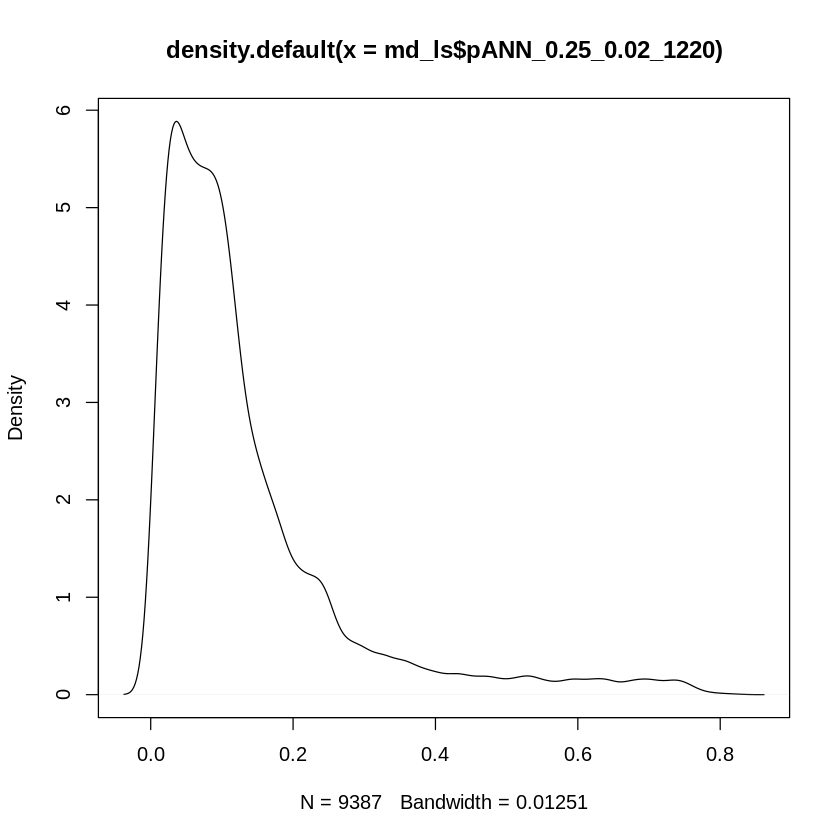

In [33]:
plot(density(md_ls$pANN_0.25_0.02_1220))
thr_ls = sort(md_ls$pANN_0.25_0.02_1220,decreasing = T)[nExp_poi_ls]
thr_ls = 0.2

sum(md_ls$pANN_0.25_0.02_1220 > thr_ls)


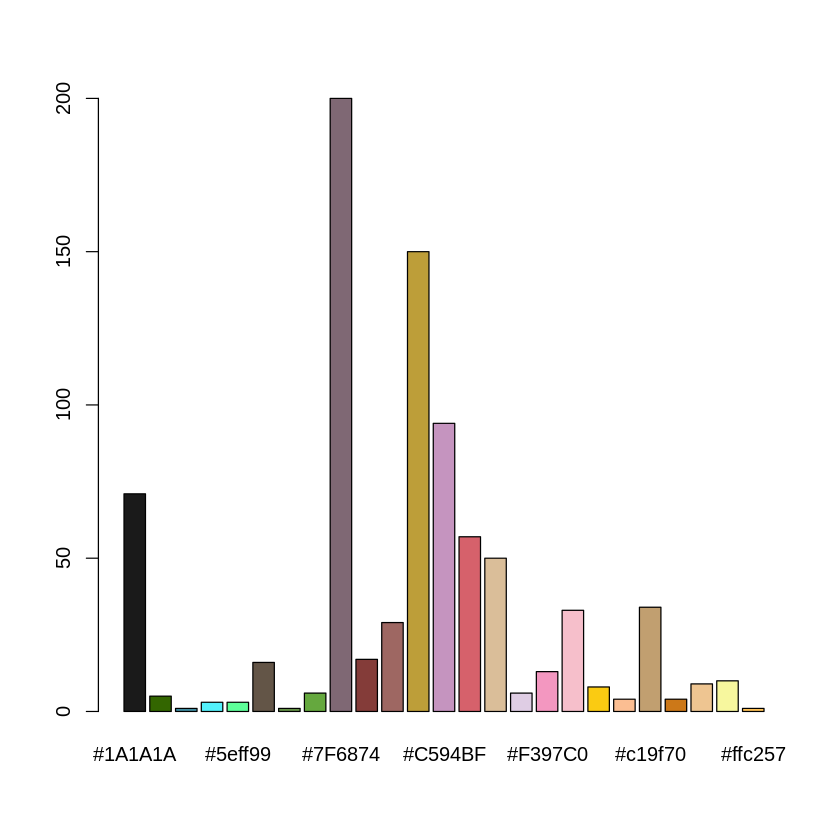

In [32]:
doublet_cells_ls = rownames(md_ls)[md_ls$pANN_0.25_0.02_1220 > thr_ls]
doublet_ct_freq = table(mc@colors[mc@mc[doublet_cells_ls]])
barplot(doublet_ct_freq,col = names(doublet_ct_freq))

In [34]:
seu_hf = CreateSeuratObject(mat_hf)
seu_hf <- NormalizeData(seu_hf)
seu_hf <- FindVariableFeatures(seu_hf, selection.method = "vst", nfeatures = 2000)
seu_hf <- ScaleData(seu_hf)
seu_hf <- RunPCA(seu_hf)
seu_hf <- RunUMAP(seu_hf, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  Apob, Apom, Cubn, Apoa1, Rbp4, Apoc2, Ttr, Ctsh, Amn, Lgmn 
	   Tdh, S100g, Dab2, Afp, Slc13a4, Folr1, Spink1, Lgals2, Clic6, Mttp 
	   Myo6, Cotl1, Ctsb, Car7, Atp1b1, Gipc2, Apoe, S100a1, Selenop, Fxyd2 
Negative:  Tmsb10, Fabp5, Ifitm2, Pclaf, Tuba1a, Pbx1, Myh10, Ccnd2, Marcks, Prdx2 
	   Hdgf, Stmn1, Idi1, Basp1, Hmga2, Chd7, Msn, Mns1, Cald1, Sox11 
	   Mest, Fdps, H1fx, Grb10, Vim, H2afy2, Sox4, Gsta4, Flna, Zeb2 
PC_ 2 
Positive:  S100a6, Plet1, Sfn, Capg, Tfap2c, Krt7, Krt19, Fstl3, Entpd1, Serpinb6b 
	   Arhgdib, Ldoc1, Plac1, Cdh5, Nfkbiz, Lgals1, Arpc1b, Lgals3, Fxyd5, Procr 
	   Anxa2, Prl2a1, Satb1, S100a11, Capn1, Lipg, Gata3, Plac8, Ascl2, Ube2a 
Negative:  Mdk, Stmn1, Bex4, Cd24a, Pbx1, Gpc3, Ifitm2, Prtg, Pclaf, Fn1 
	   Mns1, Bex2, Ccnd2, Slc39a8, Cpox, Hbb-bh1, Gja1, Prkar2b, Hipk2, Cited4 
	   Hspd1, Hba-a1, Hba-x, Ncl, Lmo2, Klf1, Rgs10, Rasgrp2, Gypa, Gsta4 
PC_ 3 
Positive:  Hbb-bh1, Cited4, Car2, Hba-x, Hba-a

In [35]:
## pK Identification (no ground-truth) ---------------------------------------------------------------------------------------
sweep.res.list.hf <- paramSweep_v3(seu_hf, PCs = 1:10, sct = FALSE)

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


In [36]:
sweep.stats.hf <- summarizeSweep(sweep.res.list.hf, GT = FALSE)

In [37]:
nExp_poi_hf <- round(0.075*nrow(seu_hf@meta.data))

NULL


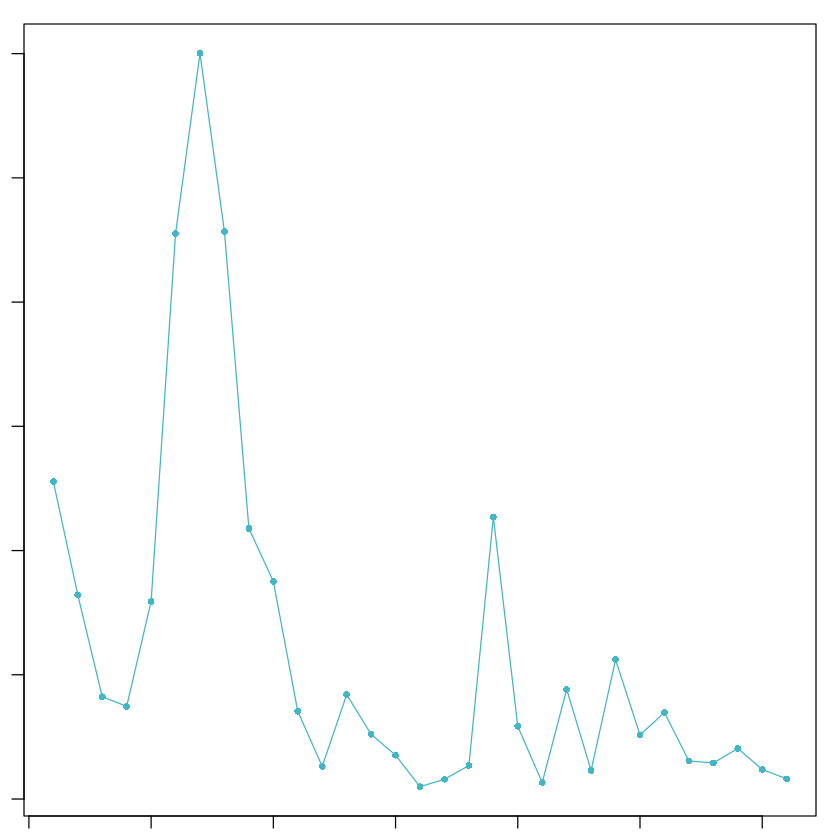

In [40]:
bcmvn.hf <- find.pK(sweep.stats.hf)

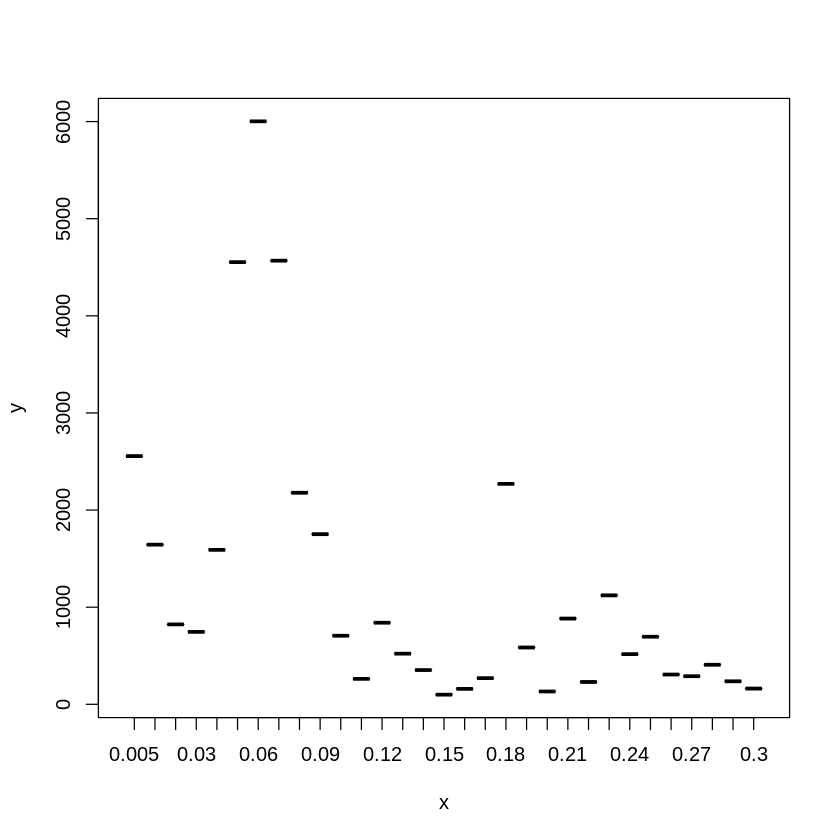

In [41]:
plot(x = bcmvn.hf$pK,y = bcmvn.hf$BCmetric)

In [43]:
nExp_poi_hf

optimal.pK.hf

[1] 294

[1] 0.06

In [92]:
## Run DoubletFinder with varying classification stringencies ----------------------------------------------------------------
optimal.pK.hf = as.numeric(as.character(bcmvn.hf$pK[which.max(bcmvn.hf$BCmetric)]))
optimal.pK.hf = 0.01
seu_hf <- doubletFinder_v3(seu_hf, PCs = 1:10, pN = 0.25, pK = optimal.pK.hf, nExp = nExp_poi_hf, reuse.pANN = FALSE, sct = FALSE)
md_hf = (seu_hf@meta.data)


[1] "Creating 1305 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


[1] 291

[1] 3916

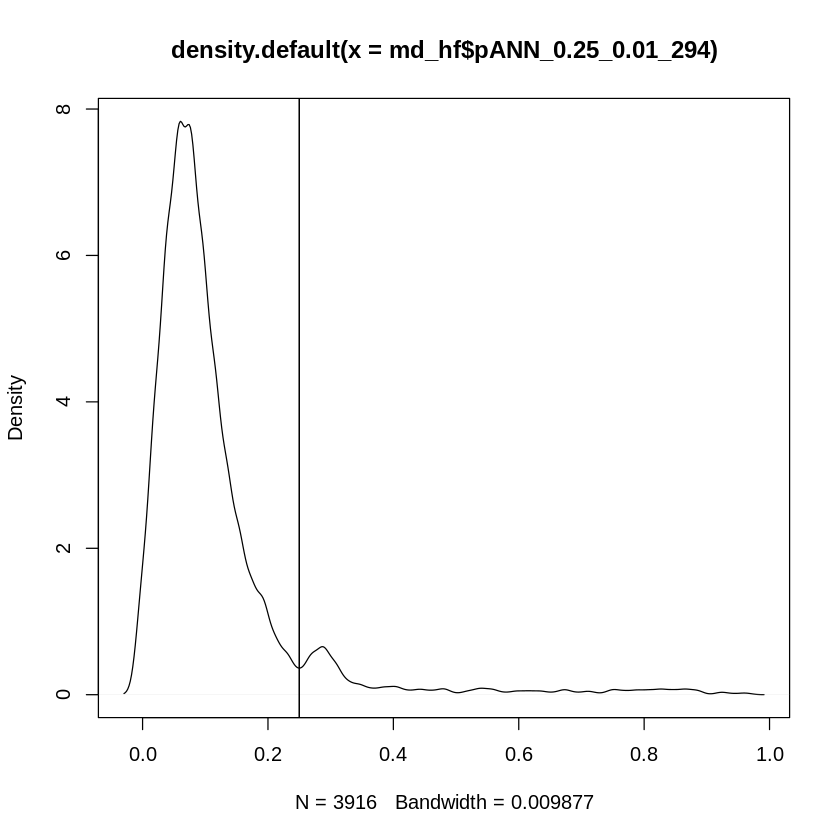

In [99]:
plot(density(md_hf$pANN_0.25_0.01_294))
thr_hf = sort(md_hf$pANN_0.25_0.01_294,decreasing = T)[nExp_poi_hf]
abline(v = thr_hf)
#thr_hf = 0.4
abline(v = thr_hf)

sum(md_hf$pANN_0.25_0.01_294 > thr_hf)
nrow(md_hf)


[1] 291

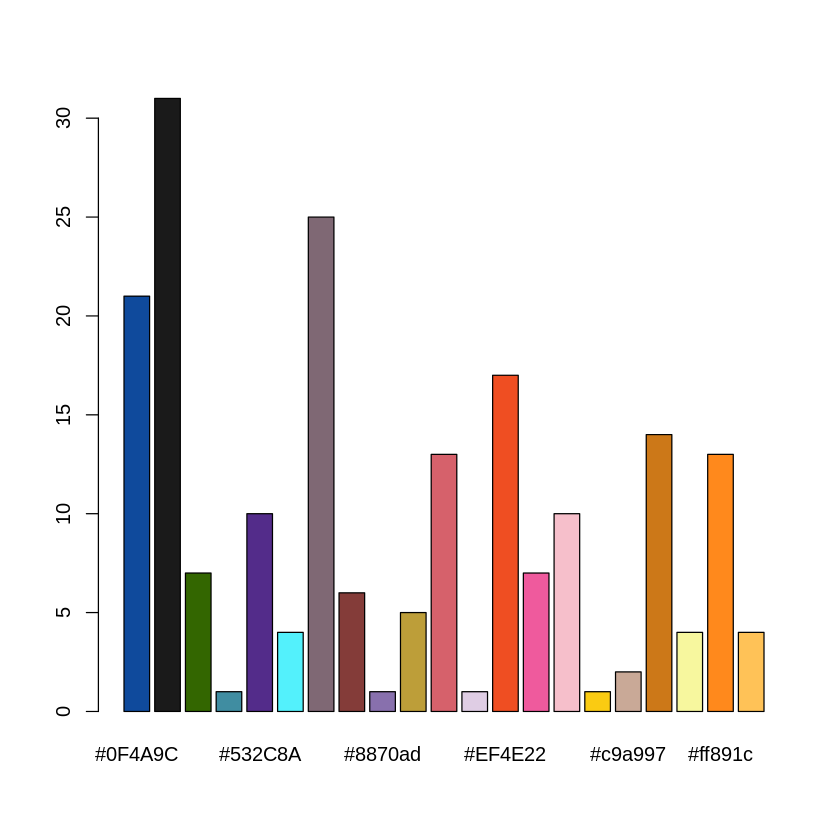

In [101]:
doublet_cells_hf = rownames(md_hf)[md_hf$pANN_0.25_0.01_294 > thr_hf]
doublet_ct_freq_hf = table(mc@colors[mc@mc[doublet_cells_hf]])
barplot(doublet_ct_freq_hf,col = names(doublet_ct_freq_hf))
length(doublet_cells_hf)

In [104]:
doublet_cells = c(doublet_cells_ls,doublet_cells_hf)
mat_f = scm_ignore_cells(scmat = mat,ig_cells = c(doublet_cells,mat@ignore_cells))
scdb_add_mat(id = "exutero_f",mat = mat_f)

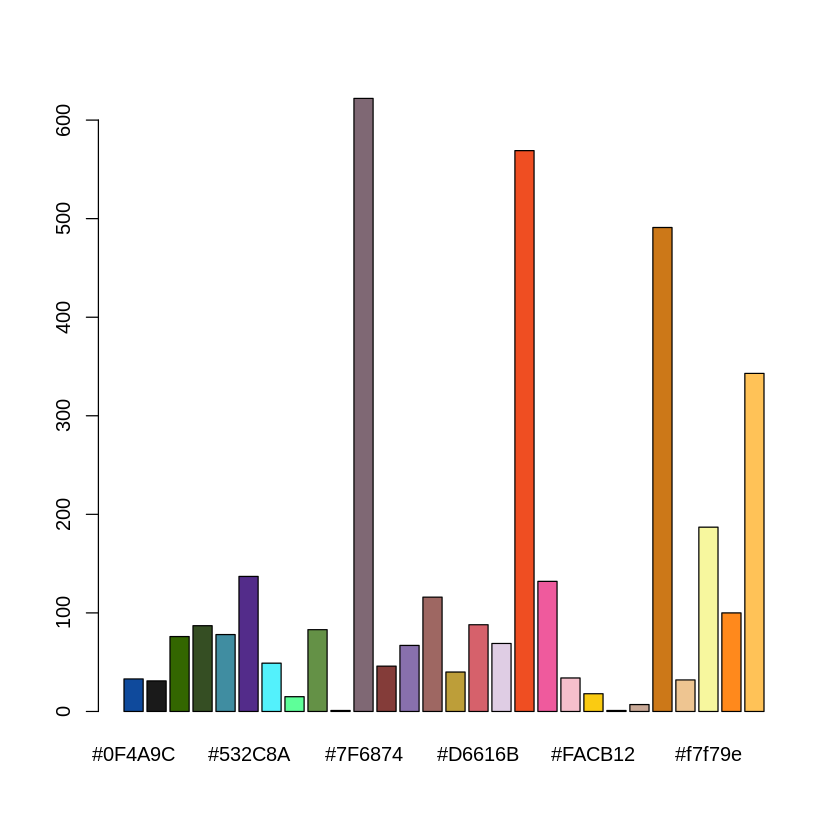

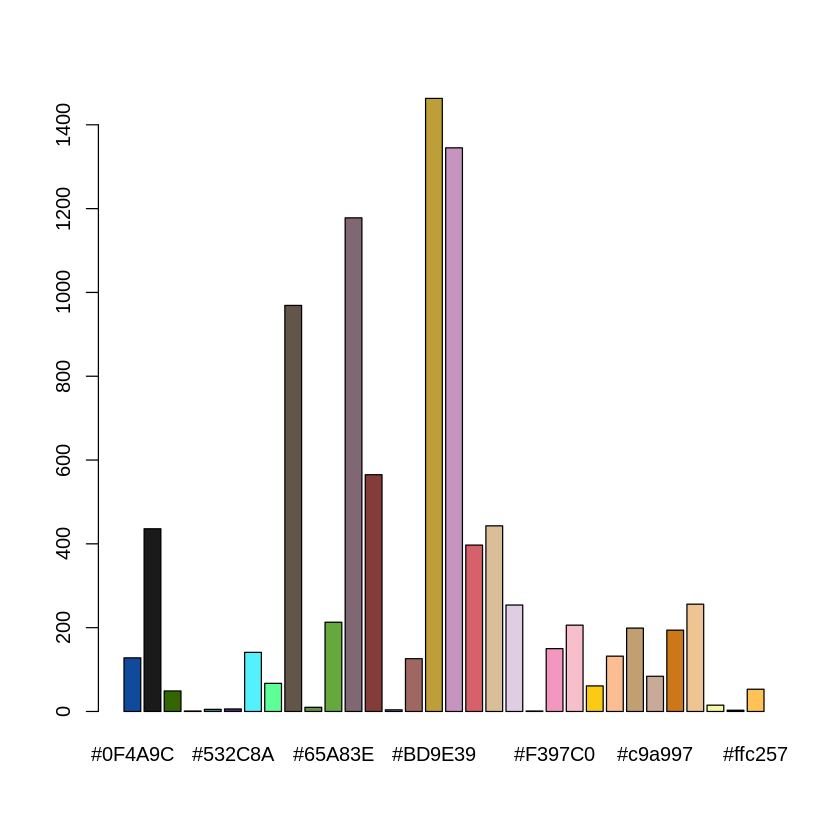

In [102]:
barplot(table(mc@colors[mc@mc[cells_hf]]),col = names(table(mc@colors[mc@mc[cells_hf]])))
barplot(table(mc@colors[mc@mc[cells_ls]]),col = names(table(mc@colors[mc@mc[cells_ls]])))